# Matplotlib Architecture  
- Three Layers:
  - Backend Layer
  - Artist Layer. 
  - Scripting Layer (pyplot)

### Backend Layer  
- Primarily describes which environment matplotlib is rendering graphics to - an OS, web browser, harcopy. Many backends available  
- Not all backends support interactive features, like the backend for jupyter notebook. There are backends for rendering to graphic formats like svg, png, pdf.  
- Backends vary by type of OS like for MAC and linux.  
- Functional use of backend is described in three main classes 
  - FigureCanvas : Functionality about setting up a canvas to draw on
  - Renderer: Functionality to put ink on the canvas
  - Event : Functionality to take user input. 

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mlb
mlb.get_backend() # gets the backend being used after the magic command above

'nbAgg'

### Artist Layer  
- Provides functionality to construct what to put on the canvas  
- Artist layer is an abstraction around drawing and layouts. 
- Artist layer consists of primitives and components. Primitives represent standard  objects that we want to put oncanvas like Lines(Line2D), Rectangles,Axis, Images etc and components are objects that hold them - Figure, Axes, Axis, all classes.  
  * Standard method is to create an instance of Figure, which is used to create an axes object, and helper function from axes object are used to create  primitives.  
  * Axes is the most important compnent, and methods available for Axes can be used to add a lot of primitives to the Axes object.

### Scripting Layer  
- Oriented to make it easy for user interested to do exploratory work, to use the Artist and Backend layer  
- UI developers and Webapp developers would ideally use programming model of Backend Layer and Artist Layer  
-  Data scientists would typically use scripting layer to pull together plots quickly

#### A read on architectural aspects 
http://www.aosabook.org/en/matplotlib.html

#### Ten rules for effective visualizations. 
http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833

#### Procedural vs Declarative Visualization languages   
pyplot is a procedural viz. language, needing commands to be issued to backend to render plotting objects.
In declarative languages viz. are created as document object models. Eg: html and d3.js

### Basic Plotting with Matplotlib  
1. Using pyplot scripting API  
2. By using Object API / or Artist Layer

### 1. Using pyplot scripting API  
Every plot uses artist components - figure(), axes(), axis(), and artist primitives. But when we use pyplot API, these details are taken care of for us.  
1. if we use plot method of the API, it creates a figure object, and axes object, and associates axes object to the figure object. 
2. It keeps a track of figure being plotted on through gcf() and associated axes through gca(), and makes call to plot() method of the axes objects to creates primitives, through argument specified in plot method. 
3. plt.plot? conveys that this method takes undefined number of arguments as  tuples or keyword arguments. It sort of lacks clarity about all that you could specify, and needs figuring out through matplotlib documentation.

** The backend nbAgg allows for interactive plotting, and you can update the same plot, with sequential calls to plot.
But matplot inline magic command brings up a backend which is not interactive and every call to plot creates a new plot **

In [3]:
%matplotlib inline

In [4]:
mlb.get_backend()

'module://ipykernel.pylab.backend_inline'

In [13]:
%matplotlib notebook

In [8]:
from matplotlib import pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


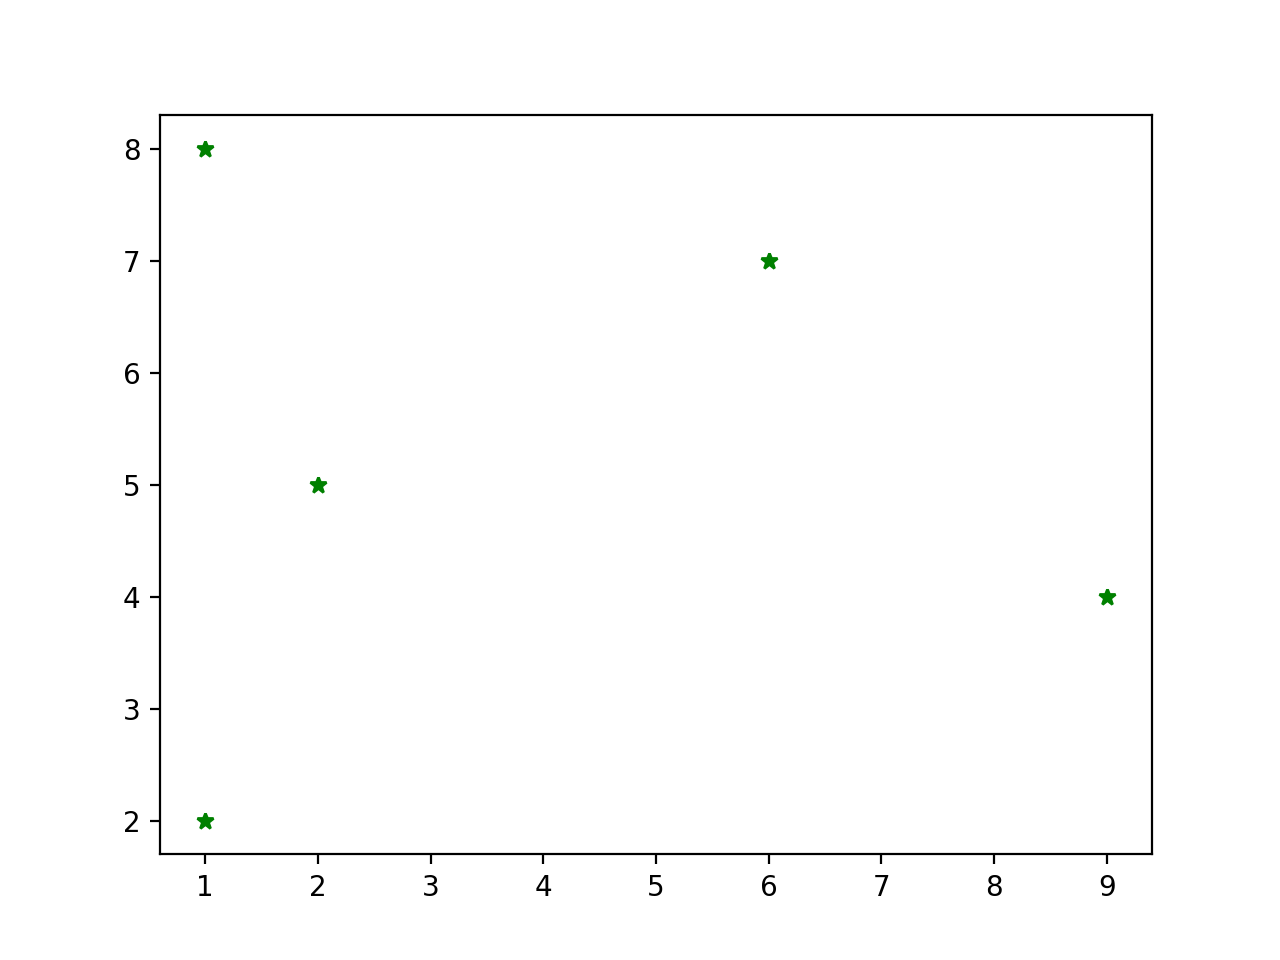

In [9]:
x = np.random.randint(low = 1, high= 10,size= 5)
y = np.random.randint(low = 1, high= 10,size= 5)
plt.plot(x,y,'g*')

Plot return a Line2D object which is a primitive

### 2. Use of Artist Layer 
- It is more work to use Arist Layer

In [10]:
from matplotlib.backends.backend_agg import FigureCanvas # import canvas 
from matplotlib.figure import Figure  # import Figure class
fig = Figure() # Create a specific figure object
canvas = FigureCanvas(fig)  # Associate figure with the canvas

In [11]:
ax = fig.add_subplot(1,1,1) # Add a subplot to the figure, it returns an Axes object 
ax

In [12]:
ax.plot(3,2, '.')  # use plot method from axes object, this does not render a plot because jupyter notebook expect use 
# pyplot scripting language

In [13]:
# save the image
canvas.print_png('test.png')

In [15]:
# use html to render the saved image
%%html 
<img src= 'test.png'/>

SyntaxError: invalid syntax (<ipython-input-15-acea1bb00b61>, line 2)

### Use of scripting layer
 - gcf(), gca() return current figure and axes

<IPython.core.display.Javascript object>


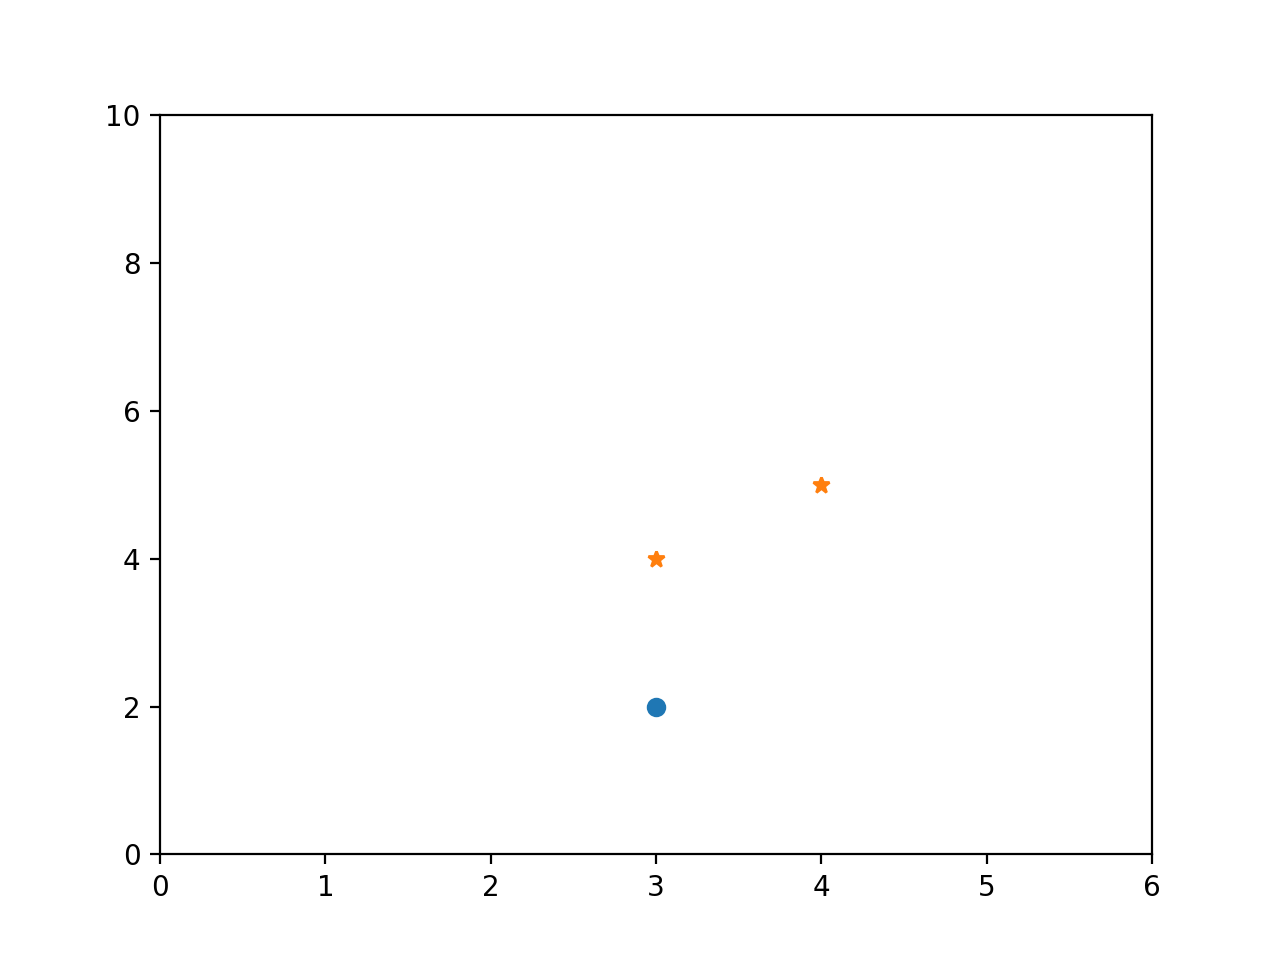

In [16]:
plt.figure()  # create a new figure, we are not storing it in an object
plt.plot(3,2, 'o') # plots on this figure

In [17]:
# set axes limits 
ax = plt.gca()
ax.axis([0,6,0,10]) # takex min, max of X and Y axis

[0, 6, 0, 10]

** updates the current figure, as we are using pyplot scripting language and it renders to nb_agg backend **

In [18]:
ax.plot((4,3),(5,4), '*')  # Adds two new points on the plot, it recognized these to be different data elements that 
#prior elements and so adds a different color

In [23]:
ax = plt.gca()
ax.get_children()

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

### Major Plots

### 1. Scatterplots

### matplotlib operates on numpy arrays, we can plot multiple series on a single plot by creating the axes() artist and adding more children artists or directly using pyplot

<IPython.core.display.Javascript object>


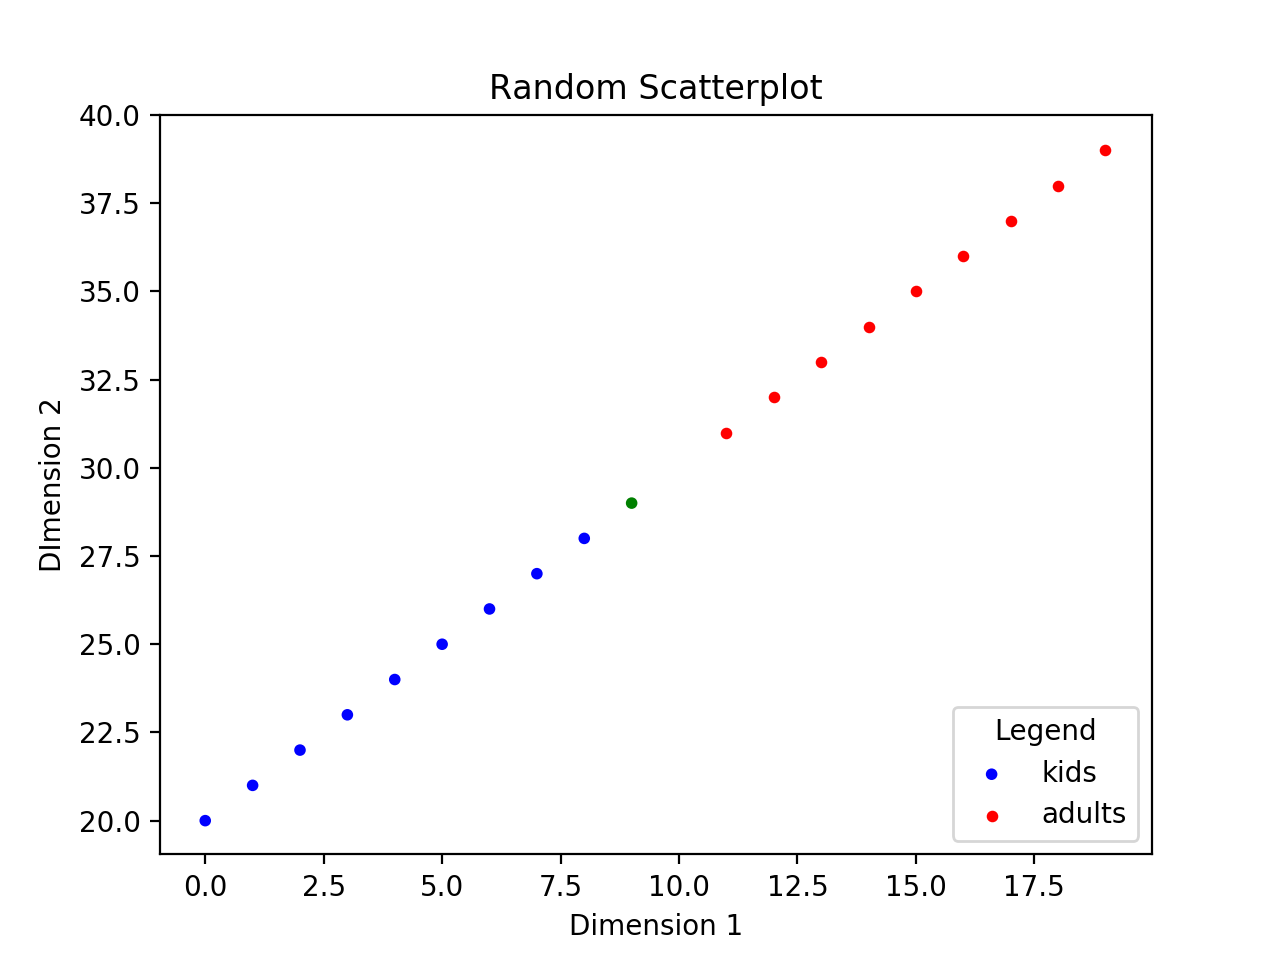

In [19]:
import numpy as np
x = np.arange(20)
y = np.arange(20,40)
plt.figure()
ax = plt.gca()
colors = ['blue']*9
colors.append('green') # each point can be separately colored
ax.scatter(x[:10], y[:10] , s = 10, c = colors, label = 'kids') # label can be passed leveraging **kw arguments
ax.scatter(x[11:], y[11:] , s = 10, c = 'red', label = 'adults') # useful for legend

** pyplot mirrors axes methods, so adding titles and axes labels can be done using pyplot **

In [20]:
plt.title('Random Scatterplot') 
plt.xlabel('Dimension 1')
plt.ylabel('DImension 2')

Text(67.3194,0.5,'DImension 2')

In [21]:
plt.legend(loc = 'lower right', frameon = True, title = 'Legend')

---

### Note on recursion and recursive functions 
- Recursive functions are the one where a call is made to the function within function definition 
- Consist of base part and recursion part. 
- Recursive part piles up unevaluated expression until the function is evaluated for the last values, and then the piled functions are evaluated 

In [27]:
def factorial(x):
    if(x==1 or x ==0):
        return 1
    else:
        return x*factorial(x-1) 

In [28]:
factorial(4)

24

---

#### How to see all children of lan artist

In [22]:
def get_child(element, depth = 0):
    from matplotlib.artist import Artist
    '''base part, test and print child'''
    if(isinstance(element, Artist)):
        print(" " * depth + str(element))
        '''recursive part'''
        for item in element.get_children():
            get_child(item, depth + 2)

In [23]:
## See children hierarchy of legend artist
get_child(plt.gca().get_children()[-2])

Legend
      Text(0,0,'Legend')
            Text(0,0,'kids')
            Text(0,0,'adults')
  FancyBboxPatch(952.736,119.489;185.375x134)


### Line Plots

- plot function can plot series objects as lines, taking the index of the series to be x axis and series values to be y axis values.  
- **scatter plot was being plotted as a series of tuples, and we could control every point's aesthetics, line is taken as a series**
- if we pass numpy arrays, it converts them to series objects and plots them as above, recognizing different lines, and coloring marker and linetypes differently  
- In a single call to plot, we can pass multiple series to be plotted, if no x axis values are specified, it constructs is from the index values of the series passed
- Plot function has its own string formatting language to specify color,markertype and linetype in a string. Eg: 'gx--' as green, x as marker, -- as line type

In [24]:
x = np.arange(10)
x_cub = x **3

<IPython.core.display.Javascript object>


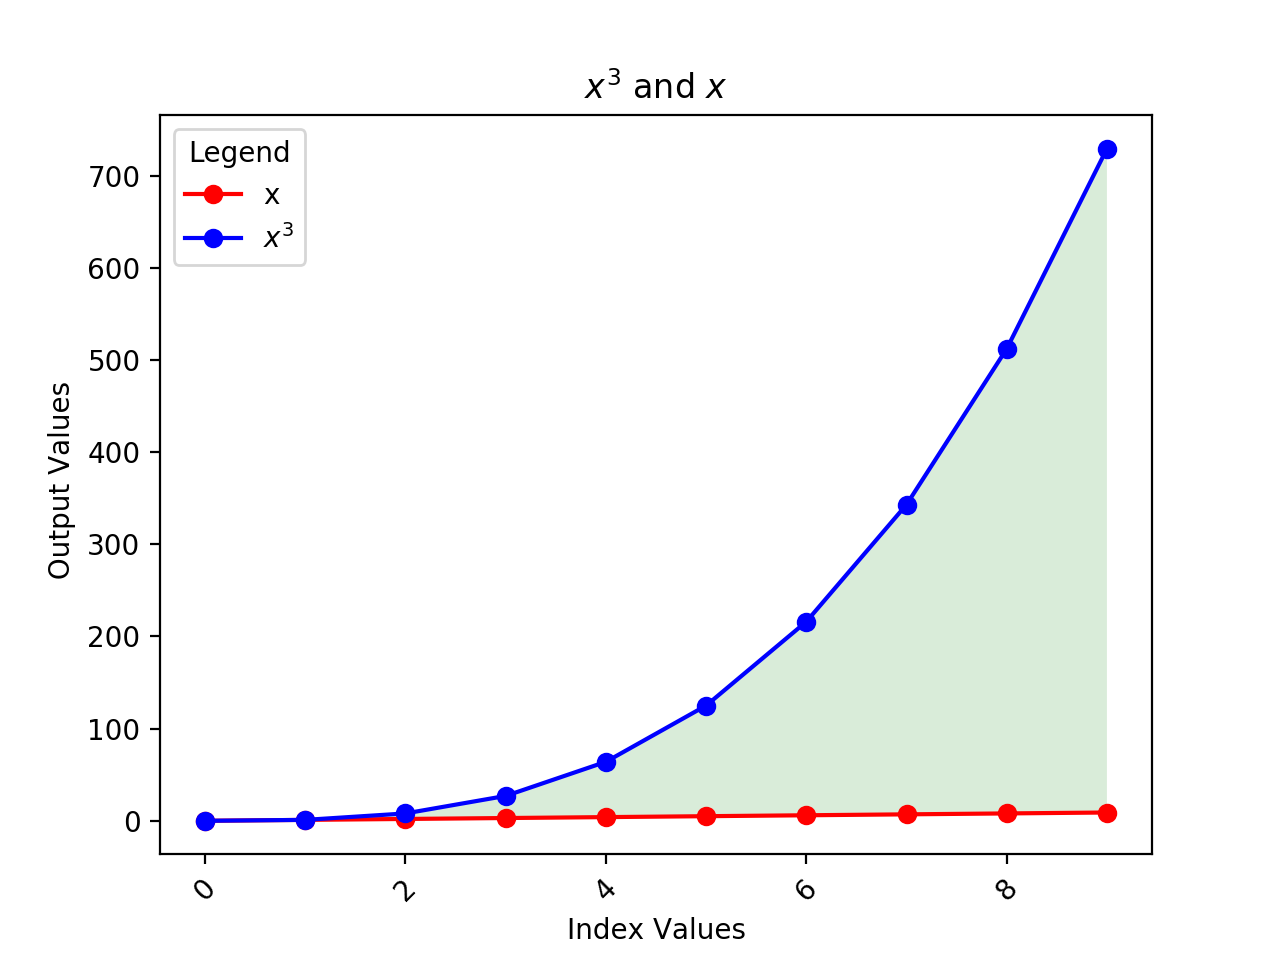

In [25]:
plt.figure()
plt.plot(x,'ro-' , x_cub, 'bo-')

** Use plot to label axes, plot supports use of Latex when specifying text. It does not require latex to be installed, but installation would extend the range of properties **

In [26]:
plt.xlabel('Index Values')
plt.ylabel(' Output Values')
plt.title('$x^3$ and $x$')
plt.legend(['x', '$x^3$'], title = 'Legend') # Legend names passed as lists, as we did not label the series

#### Use of fillbetween function - Useful to highlight error bars 

In [27]:
ax = plt.gca()
ax.fill_between(x= range(len(x)), y1 = x, y2 = x_cub ,facecolor = 'green', alpha = 0.15 )

** Plotting with a datetime index ** 
- numpy allows creation of sequence of dates, but they are not in standard libaray format that matplotli expects  
- ** datetime handling in python is a pain point between libraries, and so there are many libraries to handle date time**

In [28]:
dates1 = np.arange('2018-07-24','2018-08-03' , dtype= 'datetime64') 

<IPython.core.display.Javascript object>


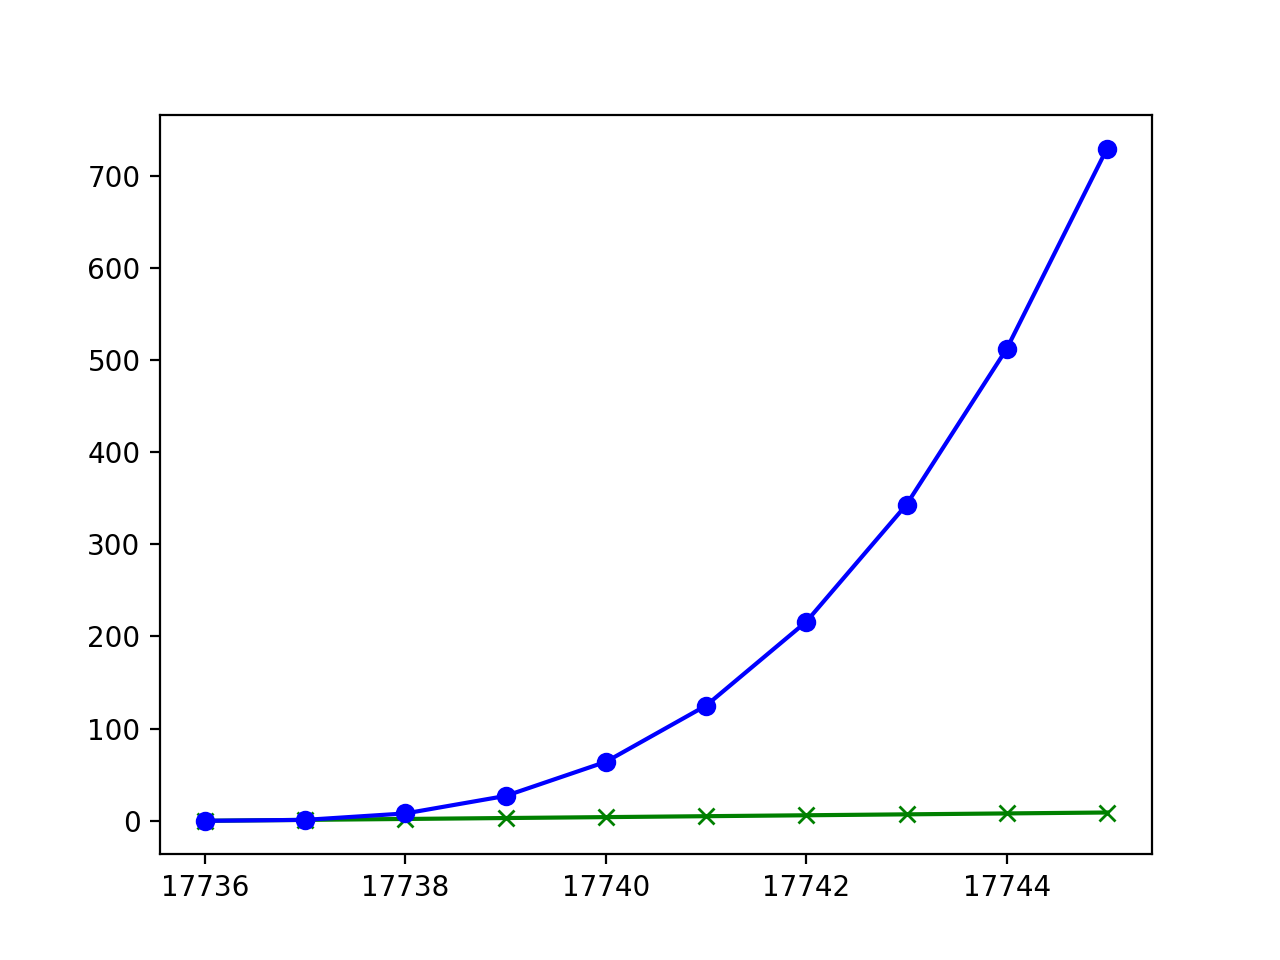

In [29]:
plt.figure()
plt.plot(dates1,x, 'gx-', dates1,x_cub, 'bo-')

### Fixing the tick labels on x axis  
- Can get the x-axis object ( which is another artist) and modify its properties by using get and set methods on properties
-  Could as well modify  the date format  

In [30]:
import pandas as pd
dates2 = pd.date_range(start= '2018-07-24', end = '2018-08-02', freq = '1D')

In [31]:
dates2 = list(map(pd.to_datetime, dates1)) # map does lazy eval.

<IPython.core.display.Javascript object>


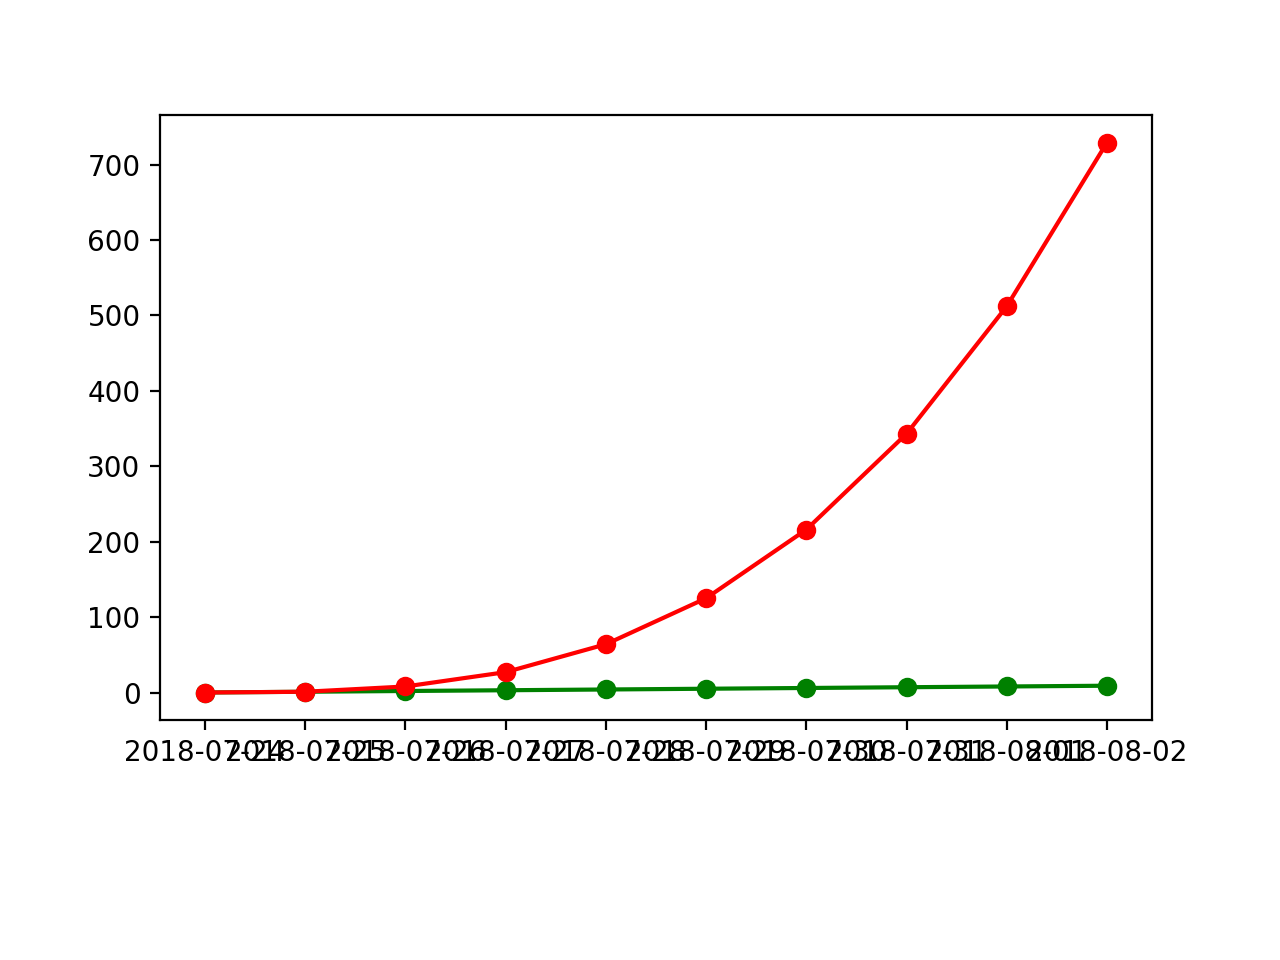

In [32]:
plt.figure()
plt.plot(dates2,x ,'go-' ,dates2, x_cub,'ro-')

In [ ]:
ax = plt.gca()

In [33]:
xaxis = ax.get_children()[6]
#get_child(xaxis)

In [34]:
# Iterate over labels, and use set_rotation property 
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

In [35]:
# Adjust the plot by extending bottom
plt.subplots_adjust(bottom = 0.25)

### Bar Charts

#### bar chart takes xvalues and heights to plot bars, of specified width.

In [63]:
plt.bar?

<IPython.core.display.Javascript object>


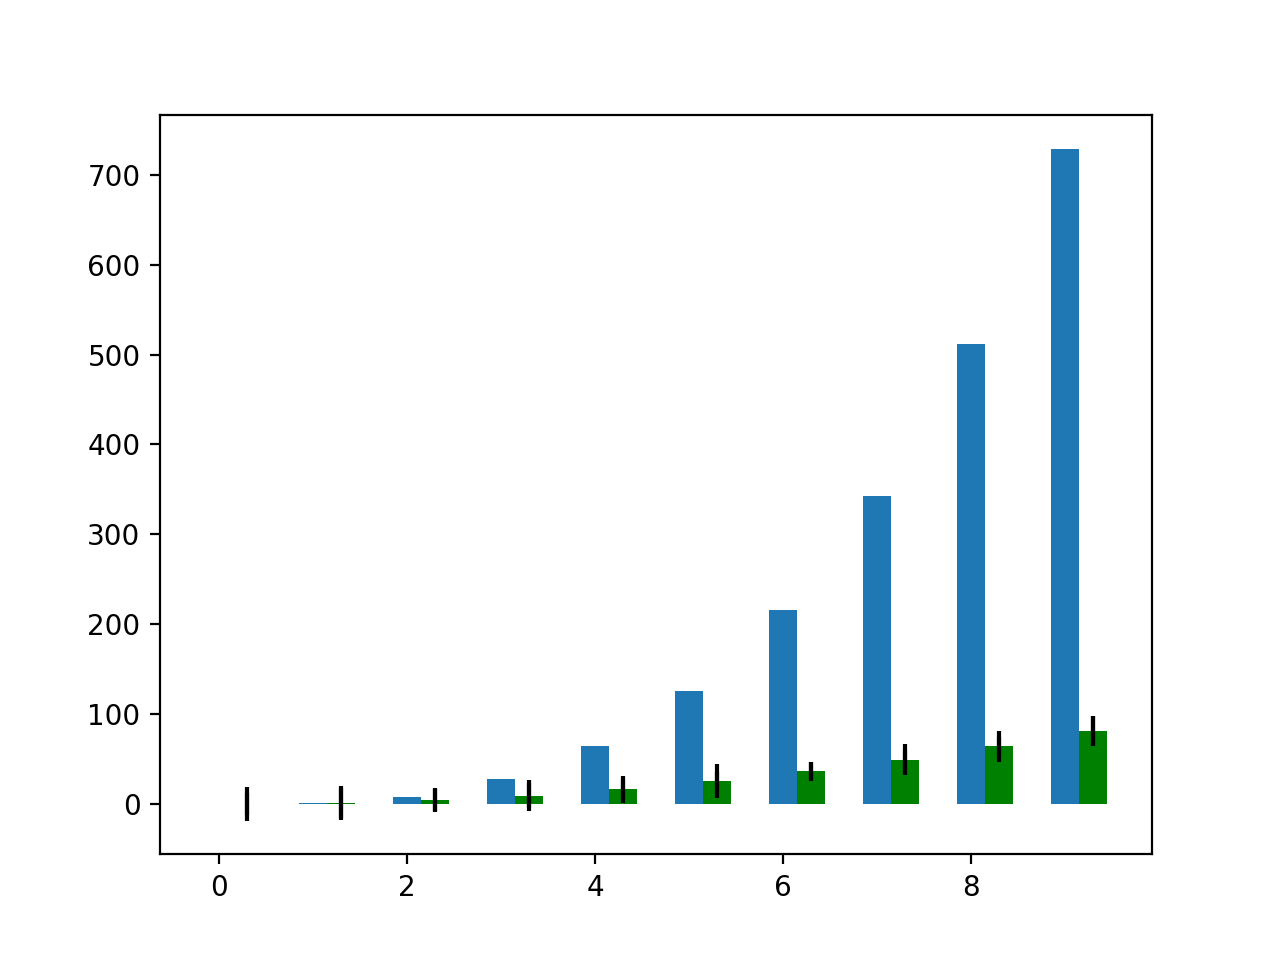

<Container object of 10 artists>

In [60]:
plt.figure()
plt.bar(x = range(len(x)), height = x_cub , width = 0.3)

#### to add another bar for comparison, specify x values again with an offset, and y values. 
- The offset allows  x values to be moved , this is kind of a hack, and there is lack of support for plotting multiple bars/groups of data against a common x axis sequence, like dates

In [61]:
new_x = [i + 0.3 for i in range(len(x))]
x_sq = x ** 2

In [62]:
plt.bar(x = new_x, height = x_sq, width = 0.3,color = 'red')

<Container object of 10 artists>

#### Adding error bars to bar charts

In [66]:
plt.bar(x = new_x, height = x_sq,yerr = np.random.randint(low = 10, high  =20, size = len(x)), width = 0.3,color = 'green')

<Container object of 10 artists>

#### stacked bar charts

<IPython.core.display.Javascript object>


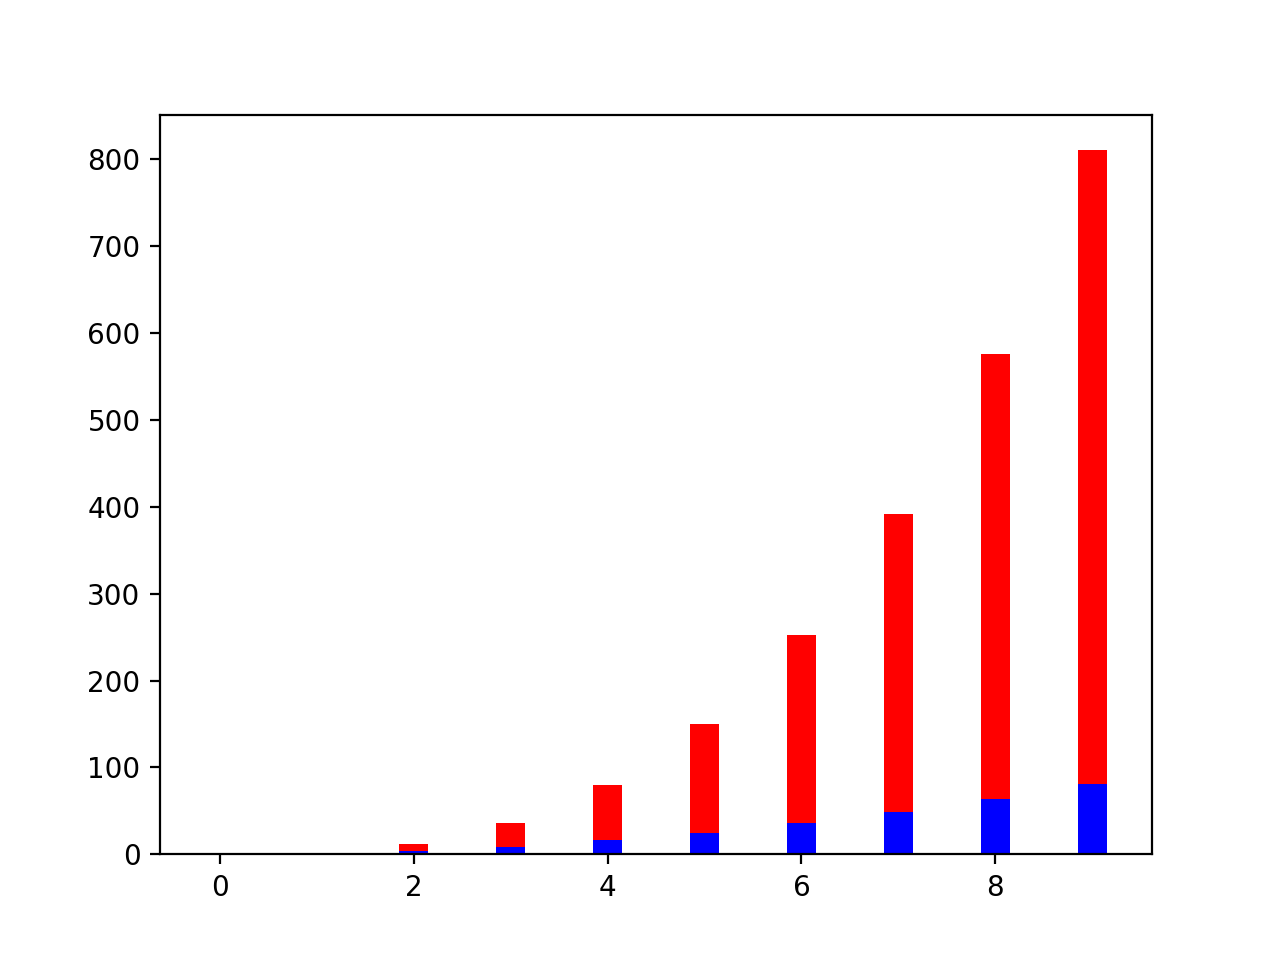

<Container object of 10 artists>

In [71]:
plt.figure()
plt.bar(x = x, height = x_sq, width = 0.3, color = 'blue')
plt.bar(x = x, height = x_cub, width = 0.3, color = 'red', bottom = x_sq) # specify same x coordintaes and a bottom 
#parameter

In [78]:
plt.barh?

### Changing alignment

<IPython.core.display.Javascript object>


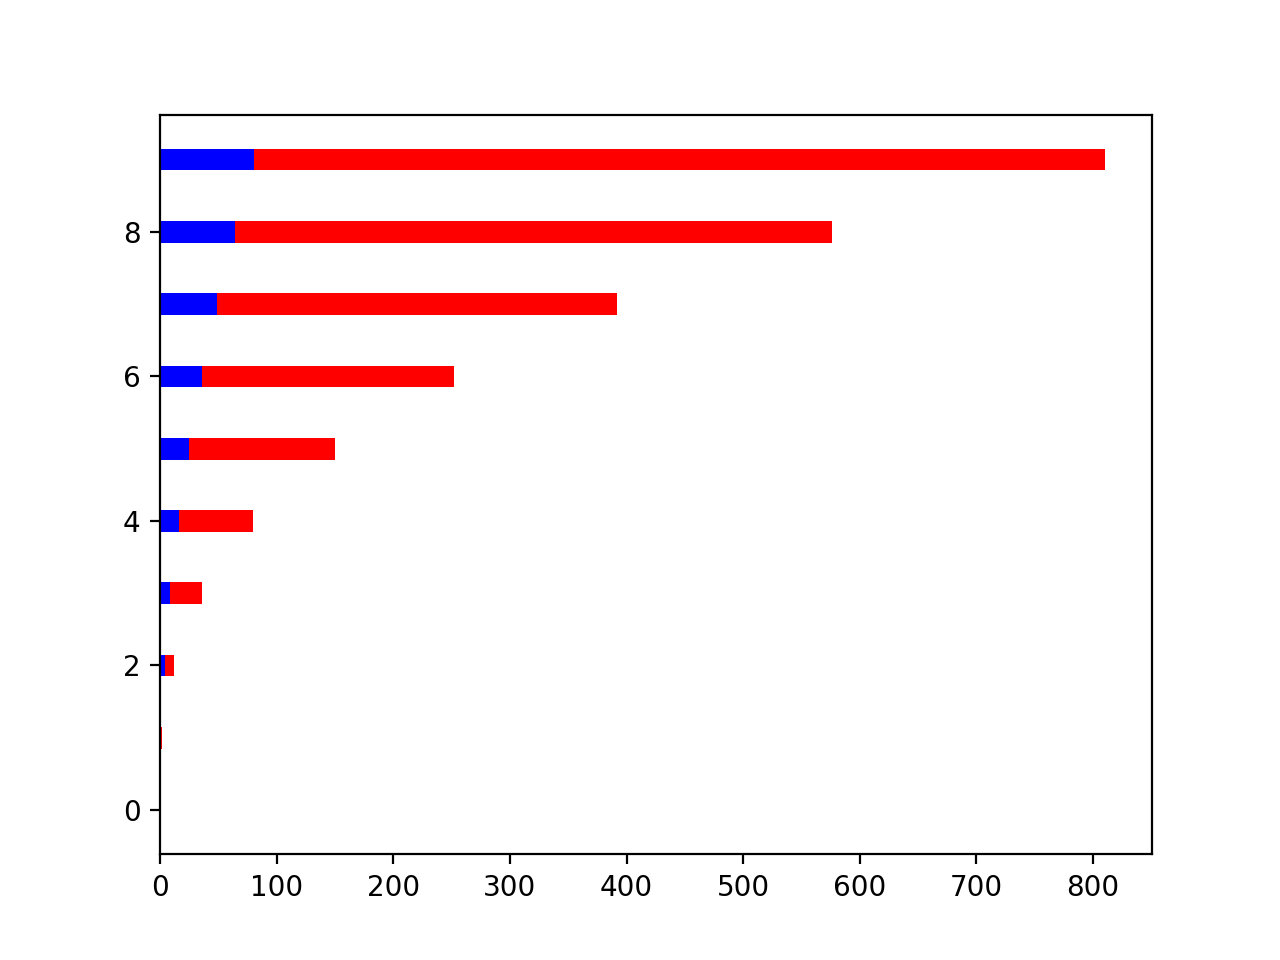

<Container object of 10 artists>

In [79]:
plt.figure()
plt.barh(y = x, width = x_sq, height = 0.3, color = 'blue')
plt.barh(y = x, width = x_cub, height = 0.3, color = 'red', left = x_sq) # specify same x coordintaes and a left 
#parameter this time, x changes to y, widt and height to be swapped